# Load csv into dataframe

In [6]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

import pandas as pd
import numpy as np
import nlpaug.augmenter.word as naw
from sklearn.utils import shuffle
from tqdm.notebook import tqdm

In [7]:
data = pd.read_csv('cyberbullying_tweets.csv')

ENCODE_DICT = {'not_cyberbullying': 0,
             'gender': 1,
             'religion': 2,
             'other_cyberbullying': 3,
             'age': 4,
             'ethnicity': 5}
data['cyberbullying_type'] = data.cyberbullying_type.replace(ENCODE_DICT)

data = data.rename(columns={'tweet_text':'Comment', 'cyberbullying_type':'Outcome'})


# data_test = pd.read_csv('test.csv')

In [8]:
data

,Comment,Outcome
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",5
47688,Turner did not withhold his disappointment. Tu...,5
47689,I swear to God. This dumb nigger bitch. I have...,5
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,5


# Check for word count distribution to estimate max length in encoding

<AxesSubplot:>

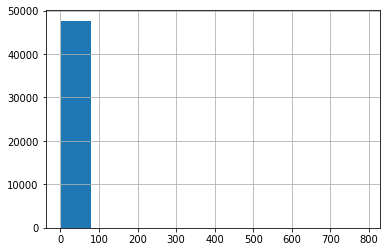

In [9]:
data['word_count'] = data['Comment'].str.split().str.len()
data['word_count'].hist()

In [10]:
data

,Comment,Outcome,word_count
0,"In other words #katandandre, your food was cra...",0,9
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,14
2,@XochitlSuckkks a classy whore? Or more red ve...,0,9
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,18
4,@RudhoeEnglish This is an ISIS account pretend...,0,18
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",5,42
47688,Turner did not withhold his disappointment. Tu...,5,45
47689,I swear to God. This dumb nigger bitch. I have...,5,20
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,5,15


# Check for class label distribution

In [11]:
data['Outcome'].value_counts()

2    7998
4    7992
1    7973
5    7961
0    7945
3    7823
Name: Outcome, dtype: int64

# Split dataset into training and validation data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.index.values, 
                                                  data['Outcome'].values, 
                                                  test_size=0.33, 
                                                  random_state=42, 
                                                  stratify=data['Outcome'].values)



data['data_type'] = ['not_set']*data.shape[0]

data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'

data[['Outcome','data_type','Comment']].sort_values('Outcome').groupby(['Outcome','Comment','data_type']).count()

Empty DataFrame
Columns: []
Index: [(0,  Never be bullied into silence. Never allow yourself to be made a victim. Accept no one's definition of your life; define yourself., train), (0, !! Annie n Lloyd!!, train), (0, !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..., train), (0, #10ReasonsToFollowMe 4) I'm a nice person, I don't mean that arrogance. I will not bully or hate. not in real life, not on twitter., val), (0, #50factsaboutme I always feel like my "friends" just pretend to like me because they only talk to me in school, train), (0, #AddYourLink Self-Defense for Kids Resources and Success Stories http://t.co/VV5KXUK Bully Prevention, val), (0, #BringBackClarkson  #GetPumped #5WordDealBreakers #TopGear #47Traitors #OTRASG #WelcometoManilaEdSheeran  http://t.co/LbD3LDtX8Y #RHOBH #mkr, train), (0, #Bullying Subscribe to my free self-defense bully blog Rss Feed http://t.co/pTQ5CsX, train), (0, #Christian Right Calls @AlFranken #Liberal Bully 4 Exposing Their Big Lie http://t.co/KboP2xX via @politicususa #politics #goplies #bigotry, train), (0, #Coppers is just legalised bullying and brutality...., train), (0, #EducateYourSelfNigga, train), (0, #Education School Bullies, Bullying, self-defense, self-defence, martial arts http://t.co/q9AqIq5, val), (0, #Enquete ~~&gt; O que Bia pode fazer contra o bullying?, train), (0, #FateNumberFor, train), (0, #FateNumberFor https://t.co/tdDhZpv7ZP, train), (0, #HealthcareIsForYouAndMeNotForFuckingIndustry, train), (0, #HowToGetAwayWithMurder? Serve raw #Spatchcock! #MKR #MKR2015, train), (0, #IfIRuledTheWorld Nobody Would Be Bullied #RealTalk, val), (0, #Itreallymakesmemad to see someone getting bullied, train), (0, #Itreallymakesmemad when people bully others., train), (0, #Itreallymakesmemad when people make fun of people and bully people with medical problems. Or even people without medical problems., train), (0, #Itreallymakesmemad when the rich bully the poor!, train), (0, #KatandAndre just shhhh, sto…, val), (0, #KatieandNikki #MKR, train), (0, #Kerala RTE will lead to shutting down of 'Badal' schools in backward areas &amp; parents will mostly not allow them to join far away schools., train), (0, #Koscielny off which #LiverpoolFC have to take advantage of. 2 rookies in this #Arsenal back 4 and Carroll needs to bully them, train), (0, #LIBRA suka mendapatkan segala sesuatu dari kerja keras, bukan bullying / paksaan., val), (0, #MKR   Gimme a break boys....., train), (0, #MKR  http://t.co/wFpjjQPHwI, val), (0, #MKR  look at Kat and Andre. They're hoping that dessert is a festering, pussie boil., train), (0, #MKR #adbreak photo of grandson http://t.co/ol2HxrWyUK, val), (0, #MKR #mkr2015 Who is gonna win the peoples choice?, train), (0, #MKR 'There's a police boat over there - this is a crime against cooking' - ok I fully approve now of Colin being a judge!, train), (0, #MKR Always good to sell your food by calling it 'left over food'. Genius Lloyd., train), (0, #MKR Baaarrrbbeeeqquuueee #Colin, train), (0, #MKR Cat n Andre can't cook - why the hell r they on the show?, train), (0, #MKR Finally food I can relate to, train), (0, #MKR For all you pissed about Kat getting through - just think of the twitter fun we are going to have at her expense next round!, val), (0, #MKR France Vs Ireland Vs Paleo Pete...LETS RUMBLE!, val), (0, #MKR Fuck you Colin! That was total shite!, train), (0, #MKR I really hope they get out-sassed, train), (0, #MKR Kat &amp; Andre. Congratulations. You've just won a one way trip to mars., train), (0, #MKR Kat and Andre must be feeling so f.....d at this stage. It really doesn't matter what they say., train), (0, #MKR Kat's look of shock!!!! what a fake load of shit. hope she's a goner as soon as they get back into the main round. Won no fans here., train), (0, #MKR Kat, you are a dick!, val), (0, #MKR Katie.. trusting your instincts is like trusting the instincts of  the

In [13]:
data_train = data[data['data_type']=='train']
data_train.to_csv('train.csv')

In [14]:
X_train

array([27745, 34221,   621, ..., 31753, 30623,  8905], dtype=int64)

In [15]:
X_train.shape

(31953,)

In [16]:
X_val.shape

(15739,)

In [17]:
len(data[(data['data_type']=='train') & (data['Outcome']== 0)])

5323

# Apply data augmentation - synonym replacement on training data

In [63]:

import nlpaug.augmenter.word as naw

aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="substitute")


KeyboardInterrupt: 

In [ ]:
len(data)

In [ ]:
new = augment_text(data[data['data_type']=='train'], samples=9540)
data = data[data['data_type']!='train'] 
data = data.append(new)

In [ ]:
new['data_type'] = 'train'
new['word_count'] = new['Comment'].str.split().str.len()
new

In [ ]:
data

In [ ]:
data = data[data['data_type']!='train'] 
data = data.append(new)
data.to_csv('augmented_data_v0.1.csv')

# Apply data augmentation - backtranslation on training data

In [ ]:
import nlpaug.augmenter.word as naw
from sklearn.utils import shuffle
from tqdm.notebook import tqdm

In [ ]:
def augment_text_bt(df,sample_from, sample_to):
    back_translation_aug = naw.BackTranslationAug(batch_size=1, device='cuda', max_length=512)

    new_text=[]
    sample_label=[]
    translated_from_id=[]

    ori_df = df

    ## data augmentation loop
    for i in tqdm(range(sample_from,sample_to)):
#         try:
            
            text = df.iloc[i]['Comment']
            label = df.iloc[i]['Outcome']
            train_id = df.iloc[i]['train_id']
            if len(text) <= 1028:
                augmented_text = back_translation_aug.augment(text)

    #             print(train_id)
                print(text)
                print()
    #             print(augmented_text)
                new_text.append(augmented_text)
                sample_label.append(label)
                translated_from_id.append(train_id)

                if (i+1)%100==0:
                    ## dataframe
                    new=pd.DataFrame({'Comment':new_text,'Outcome':sample_label})
                    new['Outcome'] = new['Outcome'].astype(int)
                    new['data_type'] = 'train'
                    new['translated_from'] = translated_from_id
                    new['batch'] = 1
                    augmented_df=ori_df.append(new)

                    augmented_df.to_csv('augmented_train_data_bt_1-' + str(i+1) + ' v0.1.csv', index=False)
            else:
                continue
#         except:
#             pass
                
    return augmented_df

In [ ]:
data_train = pd.read_csv('augmented_train_data_bt_1-20700 v0.1.csv')
augmented_train_data_bt = augment_text_bt(data_train, sample_from = 20700, sample_to = 30000)
augmented_train_data_bt.to_csv('augmented_train_data_bt_1-30000 v0.1.csv', index=False)

# Read augmented data from csv

In [2]:
# data = pd.read_csv('augmented_data_v0.1.csv')

# data_train = pd.read_csv('augmented_train_data_bt_1-35559 v0.1.csv')[0:48067]
data_train = pd.read_csv('augmented_train_data_bt_1-13500_30000-40000v0.2.csv')
data_train = data_train.dropna(subset=['Comment','Outcome'])
data_train['Outcome'] = data_train['Outcome'].astype('int64')

data_val = pd.read_csv('val_data_v0.1.csv')
data_val = data_val.dropna(subset=['Comment','Outcome'])
data_val['Outcome'] = data_val['Outcome'].astype('int64')

data = data_train.append(data_val)

data_test = pd.read_csv('test.csv')


c:\users\qwerty\desktop\documents\nus\bt 5153 applied machine learning for business anlaytics\bk_env37\lib\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Text preprocessing (not used in final model)

In [10]:
import nltk
from bs4 import BeautifulSoup
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# STOPWORDS = set(stopwords.words('english'))

# def clean_text(x):
#     x = BeautifulSoup(x, "lxml").text
#     x = " ".join(word for word in x.split() if word not in STOPWORDS)
#     x = " ".join(x.lower() for x in x.split())
#     x = x.replace('[^\w\s]', '')
#     x = re.sub(r'\d+', '1', x)
#     return x


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qwerty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
clean_text("https://stackoverflow.com/questions/24398302/bs4-featurenotfound-couldnt-find-a-tree-builder-with-the-features-you-requeste hello this is 78678")

'https://stackoverflow.com/questions/1/bs1-featurenotfound-couldnt-find-a-tree-builder-with-the-features-you-requeste hello 1'

In [12]:
# data_train['Comment'] = data_train['Comment'].apply(clean_text)


# data_val['Comment'] = data_val['Comment'].apply(clean_text)


# data_test['Comment'] = data_test['Comment'].apply(clean_text)


c:\users\qwerty\desktop\documents\nus\bt 5153 applied machine learning for business anlaytics\bk_env37\lib\site-packages\bs4\__init__.py:438: MarkupResemblesLocatorWarning: "http://pypi.python.org/pypi/ghostscript/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
c:\users\qwerty\desktop\documents\nus\bt 5153 applied machine learning for business anlaytics\bk_env37\lib\site-packages\bs4\__init__.py:438: MarkupResemblesLocatorWarning: "http://www.devpro.it/json/files/json-js.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
c:\users\qwerty\desktop\documents\nus\bt 5153 applied machine learning for business anlaytics\bk_env37\lib\site-packages\bs4\_

In [13]:
data_train

,train_id,Comment,Outcome,Id,word_count,data_type,translated_from,batch
0,1.0,numpy scipy available (and manipulating large ...,1,48267.0,122,train,NaN,NaN
1,2.0,"iam performs process, larger list, like : list...",0,NaN,172,train,NaN,NaN
2,3.0,"problem: 1-bit python, 1-bit installer. cause ...",1,25241.0,221,train,NaN,NaN
3,4.0,"try using eval convert string type, e.g. coord...",0,7024.0,40,train,NaN,NaN
4,5.0,updated wtforms 1.1 wtforms 1.1 (december 1) s...,1,28282.0,93,train,NaN,NaN
...,...,...,...,...,...,...,...,...
67157,67154.0,"here example implementation mystring = ""\ n. j...",0,NaN,NaN,train,35595.0,1.0
67158,67155.0,"if offer us library function find diagonal, i ...",0,NaN,NaN,train,35596.0,1.0
67159,67156.0,exponential moving averages use ratio. ratio a...,0,NaN,NaN,train,35597.0,1.0
67160,67157.0,"python 1.1 format: gzip open (""path / / file,""...",1,NaN,NaN,train,35598.0,1.0


# Apply tokenization and data encoding

In [3]:
from transformers import AutoTokenizer, BertTokenizer, BertForSequenceClassification, RobertaTokenizerFast, RobertaForSequenceClassification, AlbertTokenizer, AlbertForSequenceClassification
import torch
from torch.utils.data import TensorDataset

max_length = 512

# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", do_lower_case=True)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', do_lower_case=True, max_length = max_length)
# tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2', do_lower_case=True)

In [18]:
data_train = data[data['data_type']=='train']
data_val = data[data['data_type']=='val']

encoded_data_train = tokenizer.batch_encode_plus(
#     data['Comment'].values.tolist(), 
    data_train['Comment'].values.tolist(),
    
#     add_special_tokens=True, 
    add_special_tokens=False, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    data_val['Comment'].values.tolist(), 
    
#     add_special_tokens=True, 
    add_special_tokens=False, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

# encoded_data_test = tokenizer.batch_encode_plus(
#     data_test['Comment'].values.tolist(), 
    
# #     add_special_tokens=True,
#     add_special_tokens=False, 
#     return_attention_mask=True, 
#     pad_to_max_length=True, 
#     max_length=max_length, 
#     return_tensors='pt'
# )



input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(data_train['Outcome'].values)
# labels_train = torch.tensor(data['Outcome'].values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(data_val['Outcome'].values)

# input_ids_test = encoded_data_test['input_ids']
# attention_masks_test = encoded_data_test['attention_mask']

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
# dataset_test = TensorDataset(input_ids_test, attention_masks_test)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\users\qwerty\desktop\documents\nus\bt 5153 applied machine learning for business anlaytics\bk_env37\lib\site-packages\transformers\tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


# Load pre-trained BERT model

In [19]:
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
#                                                       num_labels=2,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

# model = BertForSequenceClassification.from_pretrained("bert-large-uncased",
#                                                       num_labels=2,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

model = RobertaForSequenceClassification.from_pretrained('roberta-base',
                                                      num_labels=6,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

# model = AlbertForSequenceClassification.from_pretrained('albert-base-v2',
#                                                       num_labels=2,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

# Load train and validation data into DataLoader

In [20]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 5

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

# dataloader_test = DataLoader(dataset_test, 
#                                    batch_size=batch_size)


# Configure optimizer

In [21]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

c:\users\qwerty\desktop\documents\nus\bt 5153 applied machine learning for business anlaytics\bk_env37\lib\site-packages\transformers\optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# Configure scheduler

In [22]:
epochs = 5
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

# Check for cuda status

In [23]:
# Making the code device-agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")
        
print(f"Name of current CUDA device:{torch.cuda.get_device_name(cuda_id)}")

cuda
Is CUDA supported by this system? True
CUDA version: 11.3
ID of current CUDA device:0
Name of current CUDA device:NVIDIA GeForce RTX 2070 SUPER


# Define function for evaulation

In [24]:
import random


seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

torch.cuda.empty_cache()

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()

        predictions.append(logits)
        true_vals.append(label_ids)
        
            
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

def predict(dataloader_test):

    model.eval()
    

    predictions = []
    
    for batch in dataloader_test:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
#         loss = outputs[0]
        logits = outputs[0]

        logits = logits.detach().cpu().numpy()

        predictions.append(logits)
        
            
    
    predictions = np.concatenate(predictions, axis=0)
            
    return predictions

# Define performance metrics for evaluation 

In [25]:
from sklearn.metrics import f1_score, accuracy_score

def confusion_matrix_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return confusion_matrix(labels_flat, preds_flat)
    
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def f1_score_macro_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='macro')

def accuracy_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(labels_flat, preds_flat)

def accuracy_per_class(preds, labels):
#     label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
#         print(f'Class: {label_dict_inverse[label]}')
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

# Perform model training + save model

In [20]:


# model = RobertaForSequenceClassification.from_pretrained('roberta-base',
#                                                       num_labels=2,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)
# model.to(device)

# model.load_state_dict(torch.load('model6/finetuned_RoBERTa_epoch_1.model', map_location=torch.device(device)))

start = 1
for epoch in tqdm(range(start, epochs+start)):
    
    # move model to cuda
    model.cuda()
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
               
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }        

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
          
        
    torch.save(model.state_dict(), f'model1/finetuned_roberta_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    accuracy = accuracy_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Accuracy: {accuracy}')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/6391 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.5289610033294114
Validation loss: 0.4565538260908241
F1 Score (Weighted): 0.854079546897085
Accuracy: 0.8565347226634474


Epoch 2:   0%|          | 0/6391 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.42014323036447965
Validation loss: 0.5070242911448999
F1 Score (Weighted): 0.8666698740030425
Accuracy: 0.8677806722155156


Epoch 3:   0%|          | 0/6391 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.3776705145503607
Validation loss: 0.5234793405370325
F1 Score (Weighted): 0.8714814227224362
Accuracy: 0.8732448058961815


Epoch 4:   0%|          | 0/6391 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.32530014357242404
Validation loss: 0.5946864933770498
F1 Score (Weighted): 0.8700349484107748
Accuracy: 0.8724823686384141


Epoch 5:   0%|          | 0/6391 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.28363006130646845
Validation loss: 0.6506882102086631
F1 Score (Weighted): 0.8692506716471704
Accuracy: 0.8708304212465849


In [25]:
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    val_macro_f1 = f1_score_macro_func(predictions, true_vals)
    accuracy = accuracy_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'F1 Score (Macro): {val_f1_macro}')
    tqdm.write(f'Accuracy: {accuracy}')


Epoch 5
Training loss: 0.28363006130646845


RuntimeError: CUDA error: device-side assert triggered

In [29]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base',
                                                      num_labels=6,
                                                      output_attentions=False,
                                                      output_hidden_states=False)
model.to(device)

model.load_state_dict(torch.load('model1/finetuned_RoBERTa_epoch_3.model', map_location=torch.device(device)))

val_loss, predictions, true_vals = evaluate(dataloader_validation)
val_f1 = f1_score_func(predictions, true_vals)   
accuracy = accuracy_func(predictions, true_vals)
tqdm.write(f'Validation loss: {val_loss}')
tqdm.write(f'F1 Score (Weighted): {val_f1}')
tqdm.write(f'Accuracy: {accuracy}')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Validation loss: 0.5234793405370325
F1 Score (Weighted): 0.8714814227224362
Accuracy: 0.8732448058961815


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:\n',classification_report(true_vals, np.argmax(predictions, axis=1).flatten())) ##########

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65      2622
           1       0.89      0.89      0.89      2631
           2       0.97      0.96      0.96      2639
           3       0.67      0.86      0.75      2582
           4       0.99      0.98      0.98      2638
           5       0.98      0.98      0.98      2627

    accuracy                           0.87     15739
   macro avg       0.88      0.87      0.87     15739
weighted avg       0.88      0.87      0.87     15739



# Load model + perform final prediction on test data

In [ ]:
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
#                                                       num_labels=2,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

# model.to(device)

# model.load_state_dict(torch.load('model2/finetuned_BERT_epoch_2.model', map_location=torch.device(device)))

# predictions = predict(dataloader_test)

In [14]:

model = RobertaForSequenceClassification.from_pretrained('roberta-base',
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)
model.to(device)

model.load_state_dict(torch.load('model11/finetuned_roberta_epoch_2.model', map_location=torch.device(device)))



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [14]:
predictions = predict(dataloader_test)

In [16]:
preds = np.argmax(predictions, axis=1)

In [17]:
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
data_test['Outcome'] = preds

In [19]:
pd.set_option('display.max_rows', 500)
data_test.head(100)

,Comment,Id,Outcome
0,clearly i should have worked on this for anoth...,57525,1
1,in most cases r is an interpreted language tha...,62692,1
2,most of the algorithms for eigen value computa...,54789,1
3,if you're willing to entertain an alternate pl...,61455,1
4,try littler. littler provides hash-bang (i.e. ...,78000,1
5,either (setq ess-fancy-comments nil) if you ne...,78362,1
6,use '###' if you don't want the comments inden...,61974,1
7,you don't need the two lines: scale <- data[1]...,58798,1
8,i used the same reference (bryan o'sullivan's ...,61000,1
9,here's one way by using a closure (in the prog...,66369,1


In [20]:
result = data_test[['Id', 'Outcome']]

In [21]:
result

,Id,Outcome
0,57525,1
1,62692,1
2,54789,1
3,61455,1
4,78000,1
...,...,...
28858,53750,1
28859,56455,1
28860,78034,1
28861,62237,1


In [22]:
result.to_csv('submission_14.csv', index=False)